### Problem Statement

A large company named XYZ, employs, at any given point of time, around 4500 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons.

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.

- A sizeable department has to be maintained, for the purposes of recruiting new talent.
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

#### Goal of the case study

Model  the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### Project Lificycle

- Import & Merge Datasets
- Missing Value's Imputation
- Exploratory Data Analysis
- Feature Engineering
- Model Building
- Model Evaluation

In [1]:
# !pip install plotly

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
# import plotly as py
%matplotlib inline
# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Import & Merge Datasets

The project has 5 datasets. This dataset is for the entire year 2015.

In [3]:
# Employees check in and out data
check_in_data=pd.read_csv('../input/hr-analytics-case-study/in_time.csv',index_col=[0])
check_out_data=pd.read_csv('../input/hr-analytics-case-study/out_time.csv',index_col=[0])
# Survey data:
# Survey given by the manager of every employee
manager_survey_data=pd.read_csv('../input/hr-analytics-case-study/manager_survey_data.csv',index_col=['EmployeeID'])
# Survey given by employee.
employee_survey_data=pd.read_csv('../input/hr-analytics-case-study/employee_survey_data.csv',index_col=['EmployeeID'])
# Employee work related general details.
general_data=pd.read_csv('../input/hr-analytics-case-study/general_data.csv',index_col=['EmployeeID'])

In [4]:
check_in_data.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:

In [5]:
# Drop Vacation Days, where all employees are off
check_in_data=check_in_data.dropna(axis=1,how='all')
check_out_data=check_out_data.dropna(axis=1,how='all')

Missing values in check_in_data and check_out_data means that the employee didn't show up that day.

In [6]:
# Fill the missing values with 0
check_in_data.fillna(0,inplace=True)
check_in_data.head(1)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,0,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,0,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,0,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,0,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:34,2015-04-09

In [7]:
check_out_data.fillna(0,inplace=True)
check_out_data.head(1)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,0,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,0,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,0,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,0,2015-03-27 17:20:51,2015-03-30 17:33:09,2015-03-31 18:00:07,2015-04-01 17:32:50,2015-04-02 17:24:58,2015-04-03 17:11:46,2015-04-06 16:42:46,2015-04-07 17:55:07,2015-04-08 17:30:12,2015-04-09

In [8]:
check_in_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: object(249)
memory usage: 8.4+ MB


In [9]:
check_out_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: object(249)
memory usage: 8.4+ MB


Convert all columns to Datetime format

In [10]:
check_in_data=check_in_data.apply(pd.to_datetime,errors="raise")
check_out_data=check_out_data.apply(pd.to_datetime,errors="raise")

In [11]:
check_out_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: datetime64[ns](249)
memory usage: 8.4 MB


Find actual work hours per employee per day

In [12]:
in_out_diff=pd.DataFrame()

In [13]:
cols=check_in_data.columns
for col in cols:
    in_out_diff[col]=((pd.to_datetime(check_out_data[col].astype(str)) - 
                             pd.to_datetime(check_in_data[col].astype(str))).dt.total_seconds() / 3600.0)

Find the number of days where the employee didn't show up during 2015.

In [14]:
in_out_diff['absences_days']=(in_out_diff == 0).astype(int).sum(axis=1)

Find mean actual work hours per employee for 2015.

In [15]:
in_out_diff['mean_actual_hours']=round(in_out_diff.astype(int).mean(axis=1),2)

Drop all days and keep 'absences_days' and 'mean_actual_hours' features.

In [16]:
in_out_diff=in_out_diff[['absences_days','mean_actual_hours']]
in_out_diff.head()

,absences_days,mean_actual_hours
1,17,6.48
2,13,6.82
3,7,6.30
4,14,6.39
5,4,7.34


Explore general_data dataset.

In [17]:
general_data.shape

(4410, 23)

Check the duplication

In [18]:
general_data[general_data.duplicated()].shape

(2912, 23)

From the dupliaction check for the general dataset, it gives us that there is around two-third of the data is duplicated.

To make sure if the data is really duplicated or just coincidence in employees data similarity, will check the duplication in the Check_in dataset.

In [19]:
check_in_data[check_in_data.duplicated()].shape

(0, 249)

After ensured that the duplicated data is just coincidence in employees data similarity, I decided to keep the general_data without droping the duplicated data.
If you decided to drop the duplicated data, you can run the bellow cell.

In [20]:
# general_data.drop_duplicates(subset=None, keep='first', inplace=True)
# general_data[general_data.duplicated()]

Merge all 4 dataframers.

In [21]:
df0=pd.concat([general_data,in_out_diff,manager_survey_data,employee_survey_data], axis=1, ignore_index=False)

In [22]:
df0.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,absences_days,mean_actual_hours,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,17,6.48,3,3,3.0,4.0,2.0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,13,6.82,2,4,3.0,2.0,4.0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7,6.30,3,3,2.0,2.0,1.0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,14,6.39,2,3,4.0,4.0,3.0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4,7.34,3,3,4.0,1.0,3.0


Delete null values in the new dataframe, useful if you decided to drop the duplicated data in general_data.

In [23]:
df1=df0.copy()
df1.dropna(subset=['Age'],inplace=True)
len(df1)

4410

Check the distribution of numerical features

In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,4410.0,9.192517,8.105026,1.00,2.00,7.00,14.00,29.00
Education,4410.0,2.912925,1.023933,1.00,2.00,3.00,4.00,5.00
EmployeeCount,4410.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
JobLevel,4410.0,2.063946,1.106689,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.00,29110.00,49190.00,83800.00,199990.00
NumCompaniesWorked,4391.0,2.694830,2.498887,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,4410.0,15.209524,3.659108,11.00,12.00,14.00,18.00,25.00
StandardHours,4410.0,8.000000,0.000000,8.00,8.00,8.00,8.00,8.00
StockOptionLevel,4410.0,0.793878,0.851883,0.00,0.00,1.00,1.00,3.00


STD of 'EmployeeCount' and 'StandardHours' is 0, means that all entries have the same value.

Find the categorical features that have no change in its entities 

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [26]:
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if len(df1[col].value_counts())==1:
        print(col+" has "+str(len(df1[col].value_counts()))+ " unique value.")

Over18 has 1 unique value.


Drop 'EmployeeCount', 'StandardHours', 'Over18' features, because they do not contribute any information for the model.

In [27]:
df2=df1.copy()
df2.drop(columns = {'EmployeeCount','Over18','StandardHours'}, axis = 1 ,inplace = True)

In [28]:
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,absences_days,mean_actual_hours,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,17,6.48,3,3,3.0,4.0,2.0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,13,6.82,2,4,3.0,2.0,4.0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,7,6.30,3,3,2.0,2.0,1.0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,14,6.39,2,3,4.0,4.0,3.0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4,7.34,3,3,4.0,1.0,3.0


####  Missing Value's Imputation

Check for missing Values

In [29]:
df3=df2.copy()
df3[df3.columns[df3.isnull().any()]].isnull().sum()

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [30]:
df3.fillna(round(df3.median()),inplace=True)

#### Exploratory Data Analysis

In [31]:
df4=df3.copy()

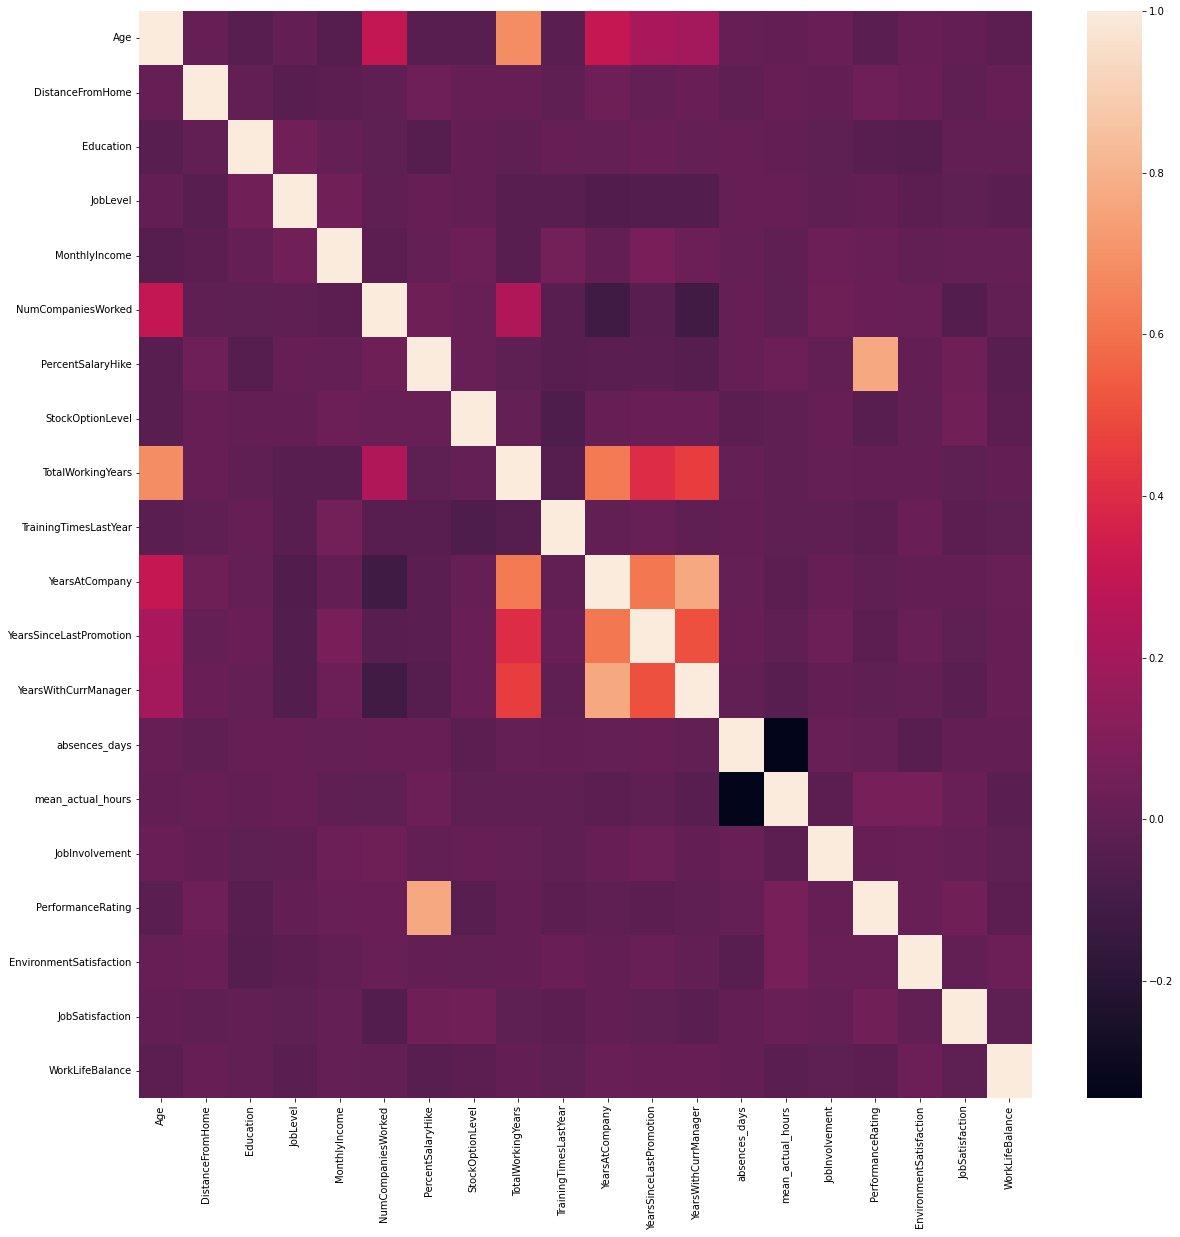

In [32]:
# Correlation matrix
corr = df4.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cbar=True)
plt.show()

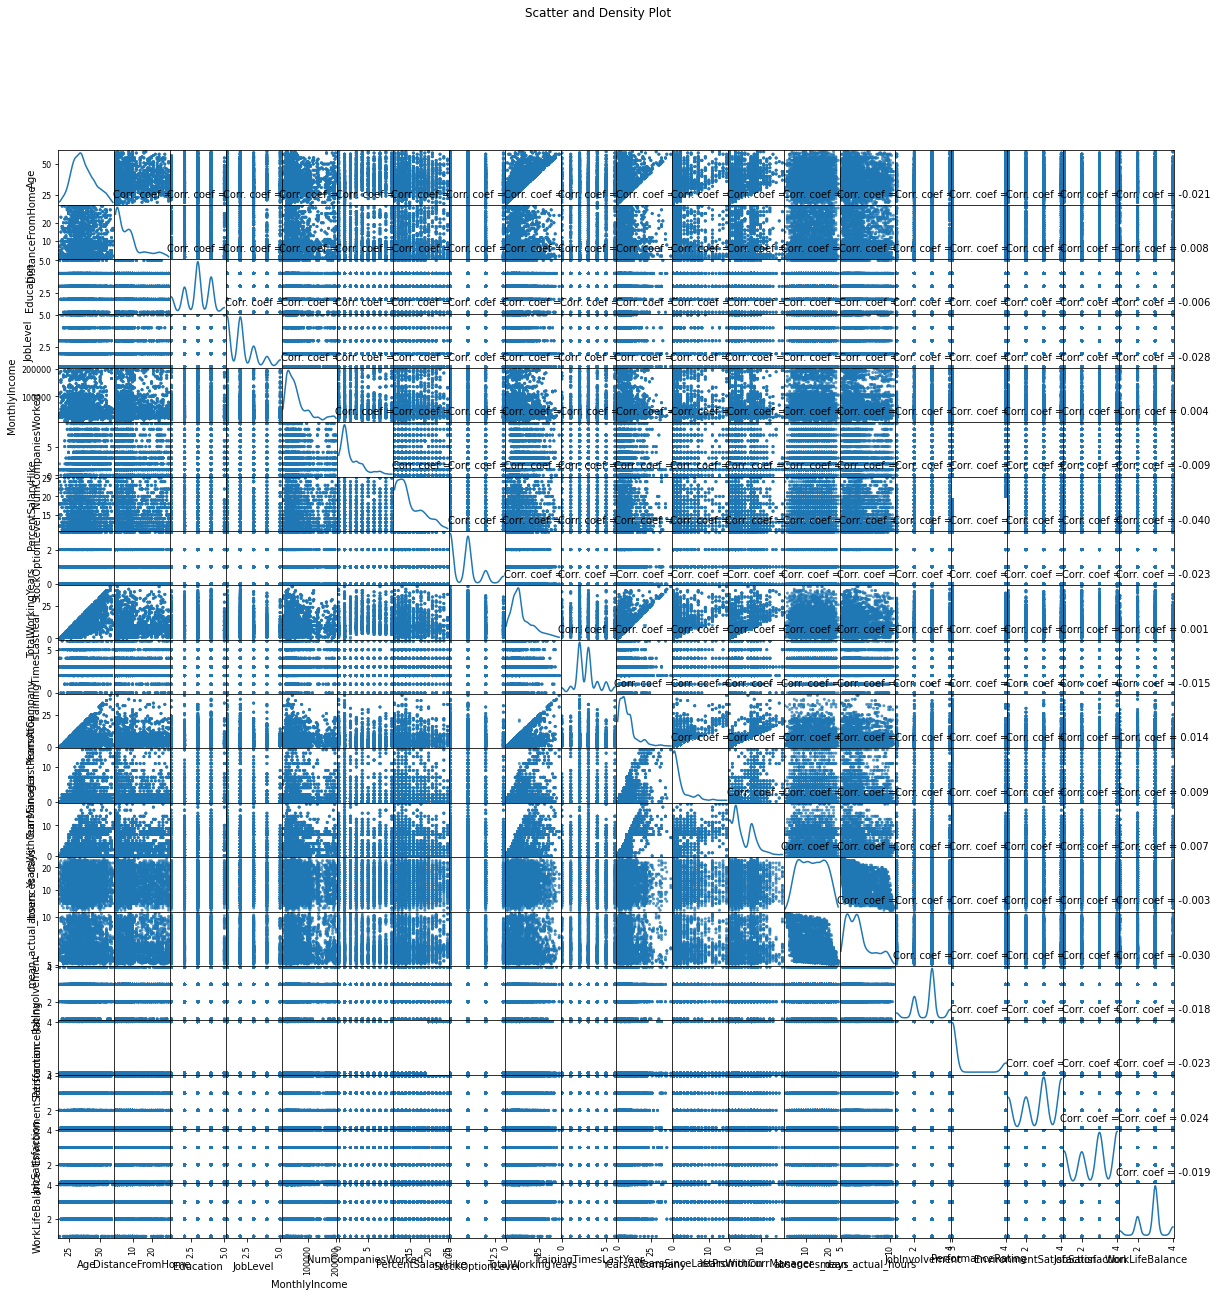

In [33]:
# Plot the scatter and density for all features
df_temp= df4.select_dtypes(include =[np.number]) # keep only numerical columns
ax = pd.plotting.scatter_matrix(df_temp, alpha=0.75, figsize=[20, 20], diagonal='kde')
corrs = df_temp.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=10)
plt.suptitle('Scatter and Density Plot')
plt.show()

Create df_eda, which is a copy of the main dataframe for performing EDA as changed a some features values from number ranks to categorical ranks for a clear plotting

In [34]:
df_eda=df4.copy()
# 
df_eda['Education'].replace({
1: 'Below College',
2: 'College',
3: 'Bachelor',
4: 'Master',
5: 'Doctor'
},inplace=True)
# 
df_eda['PerformanceRating'].replace({
1: 'Low',
2: 'Good',
3: 'Excellent',
4: 'Outstanding'
},inplace=True)
# 
df_eda['WorkLifeBalance'].replace({
1: 'Bad',
2: 'Good',
3: 'Better',
4: 'Best'
},inplace=True)
# 
for i in ['EnvironmentSatisfaction', 'JobInvolvement' , 'JobSatisfaction']:
    df_eda[i].replace({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    },inplace=True)
# 
df_eda.Age = pd.cut(df_eda.Age, range(10, 70, 10)) # Create buckets of 10 years
# df_eda.TotalWorkingYears = pd.cut(df_eda.TotalWorkingYears, range(0, 40, 5)) # Create buckets of 5 years
# df_eda.YearsAtCompany = pd.cut(df_eda.YearsAtCompany, range(0, 40, 5)) # Create buckets of 5 years
# df_eda.YearsSinceLastPromotion = pd.cut(df_eda.YearsSinceLastPromotion, range(0, 15, 3)) # Create buckets of 3 years
# df_eda.YearsWithCurrManager = pd.cut(df_eda.YearsWithCurrManager, range(0, 20, 4)) # Create buckets of 4 years

df_eda.head(50)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,absences_days,mean_actual_hours,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,"(50, 60]",No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,17,6.48,High,Excellent,High,Very High,Good
2,"(30, 40]",Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,13,6.82,Medium,Outstanding,High,Medium,Best
3,"(30, 40]",No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,7,6.30,High,Excellent,Medium,Medium,Bad
4,"(30, 40]",No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,14,6.39,Medium,Excellent,Very High,Very High,Better
5,"(30, 40]",No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4,7.34,High,Excellent,Very High,Low,Better
6,"(40, 50]",No,Travel_Rarely,Research & Development,8,Bachelor,Life Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7,12,9.74,High,Excellent,High,Medium,Good
7,"(20, 30]",Yes,Travel_Rarely,Research & Development,11,College,Medical,Male,2,Sales Executive,Single,58130,2.0,20,1,5.0,2,0,0,0,17,6.00,High,Outstanding,Low,High,Bad
8,"(20, 30]",No,Travel_Rarely,Research & Development,18,Bachelor,Life Sciences,Male,2,Sales Executive,Married,31430,2.0,22,3,10.0,2,0,0,0,6,6.02,High,Outstanding,Low,Medium,Better
9,"(30, 40]",No,Travel_Rarely,Research & Development,1,Bachelor,Life Sciences,Male,3,Laboratory Technician,Married,20440,0.0,21,0,10.0,2,9,7,8,19,6.31,High,Outstanding,Medium,Very High,Better
10,"(20, 30]",No,Non-Travel,Research & Development,7,Master,Medical,Female,4,Laboratory Technician,Divorced,134640,1.0,13,1,6.0,2,6,1,5,15,6.21,High,Excellent,Medium,Low,Better


In [35]:
# Plot function takes multi-features as a list (path) and makes an interactive multi-layers pie-chart
def sunburst_chart(df,path):
# df=> dataset
# path=> parameter corresponding to a list of columns.
#     create datasets corresponding to (Attrition) feature.
    df_temp = df.groupby(path)['Attrition'].count().reset_index()
    df_temp_yes = df[df['Attrition']=="Yes"].groupby(path)['Attrition'].count().reset_index()
    df_temp_no = df[df['Attrition']=="No"].groupby(path)['Attrition'].count().reset_index()

    Attrition_no = pd.merge(df_temp_no, df_temp, on=path, how='inner')
    Attrition_no['Attrition']='Attrition_no'
    Attrition_no['%Attrition']=round((Attrition_no['Attrition_x']/Attrition_no['Attrition_y'])*100)
    Attrition_no.drop(columns={'Attrition_x','Attrition_y'},inplace=True)

    Attrition_yes = pd.merge(df_temp_yes, df_temp, on=path, how='inner')
    Attrition_yes['Attrition']='Attrition_yes'
    Attrition_yes['%Attrition']=round((Attrition_yes['Attrition_x']/Attrition_yes['Attrition_y'])*100)
    Attrition_yes.drop(columns={'Attrition_x','Attrition_y'},inplace=True)

    result = pd.concat([Attrition_yes, Attrition_no]).reset_index(drop=True)
    # sunburst chart
    fig = px.sunburst(result, path=result.columns, values='%Attrition',
                      title= ' around the world',
                      height=620,template='none')
    fig.show()

In [36]:
sunburst_chart(df_eda,['Department','JobRole'])

- In Human resources department, Laboratory technicians and Sales executives have the largest percentage of attrition with with 46% and 44% respectively. At the same time Research scientists have the less percentage of attrition with just 8%.

- The attrition in Research and development department is low. Research directors have the largest percentage of attrition with 27%.

- The attrition in Sales department is low. Healthcare represintave have the largest percentage of attrition with 27%.

In [37]:
sunburst_chart(df_eda,['Education', 'EducationField'])

- Except the Diploma holders, the Bachelor and postgraduate in Human resources specialist holders have the largest percentage of attrition, especially PhD holder which all of them leave the company.

In [38]:
sunburst_chart(df_eda,['Gender', 'MaritalStatus','Age'])

- The female divorced and married employees have less attrition than the single employees, maybe because they have more life responsibilities than the singles.
- The female single employees who are less than 21 years old have the most ability to leave the company, maybe because most of them are interns or doesn't find the right work-invironment for them yet.
- the male employees have almost the same observations.


In [39]:
sunburst_chart(df_eda,['JobRole','JobLevel'])

- the Manufacturing directors and Sales representatives who have job-level 4, has 40% and 50% of attrition respectively.

- The highest attrition percentages in all job-rolls appeare in job-level 4.

In [40]:
sunburst_chart(df_eda,['StockOptionLevel'])

- No clear trend in attrition with respect to stock option levels offered to the employees.

In [41]:
sunburst_chart(df_eda,['NumCompaniesWorked'])

- No clear trend in attrition with respect to number of companies an employee has worked in.

In [42]:
def bar_chart(df,feature):
    fig = px.histogram(df, x=feature,
                 color='Attrition', barmode='group',text_auto=True,
                 height=400)
    fig.show()

In [43]:
bar_chart(df_eda,'BusinessTravel')

The employees who travel frequently have the largest percentage of attrition, maybe because of the exhaustion caused by business travel.

In [44]:
bar_chart(df_eda,'WorkLifeBalance')

- High attrition percentage among employees have bad work-life balance.

In [45]:
bar_chart(df_eda,'JobSatisfaction')

- More satisfaction of work, less attrition percentage

In [46]:
bar_chart(df_eda,'EnvironmentSatisfaction')

- More satisfaction of work environment, less attrition percentage

In [47]:
bar_chart(df_eda,'PerformanceRating')

- No clear trend in attrition with respect to Performance Rating.

In [48]:
bar_chart(df_eda,'JobInvolvement')

- Employees have low involvement in the work environment have a higher attrition percentage.

In [49]:
# Plot function to plot area-charts for the continuous features
def area_chart(df,feature):
    ax=sns.kdeplot(df[df_eda['Attrition']=='Yes'][feature],
             shade=True,label='Attrition = Yes')
    ax=sns.kdeplot(df[df_eda['Attrition']=='No'][feature],
                 shade=True,label='Attrition = No')
    ax.legend()

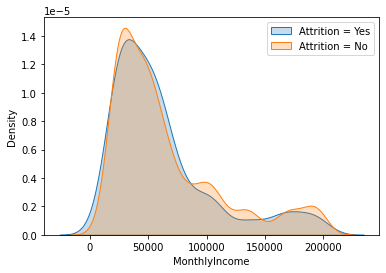

In [50]:
area_chart(df_eda,'MonthlyIncome')

- It is clear that, employees who have higher income, stay at company longer.

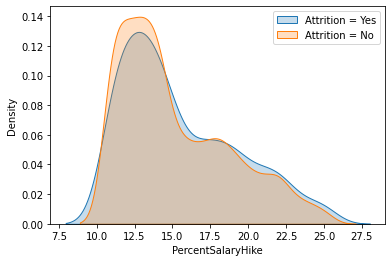

In [51]:
area_chart(df_eda,'PercentSalaryHike')

- It is clear that, employees who have higher increasing in their income, stay at company longer.

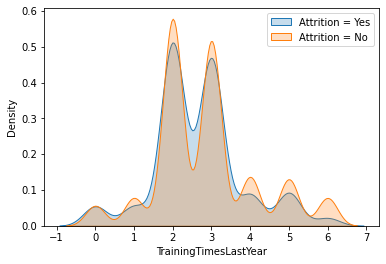

In [52]:
area_chart(df_eda,'TrainingTimesLastYear')

- No clear trend in attrition with respect to number of trainings.

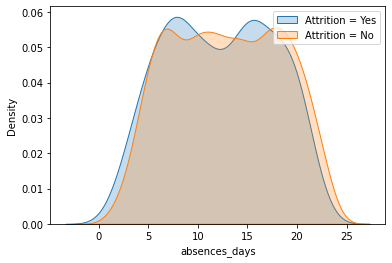

In [53]:
area_chart(df_eda,'absences_days')

- No clear trend in attrition with respect to number of absence days.

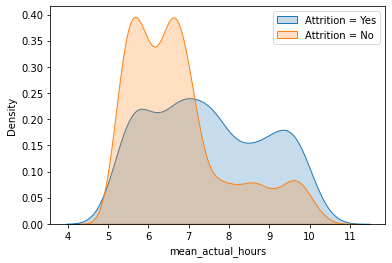

In [54]:
area_chart(df_eda,'mean_actual_hours')

- There is a clear trend, where the employees who work more hours, have the highest attrition

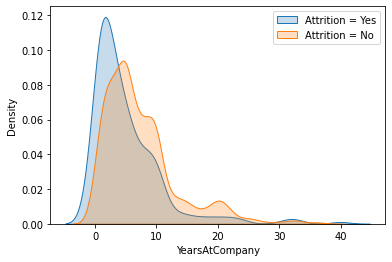

In [55]:
area_chart(df_eda,'YearsAtCompany')

- Employees who stay at company for a longer period of time have lower attrition rate.

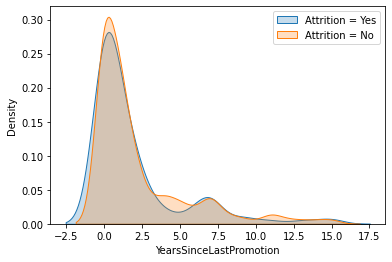

In [56]:
area_chart(df_eda,'YearsSinceLastPromotion')

- No clear trend in attrition with respect to number of years since the last promotion.

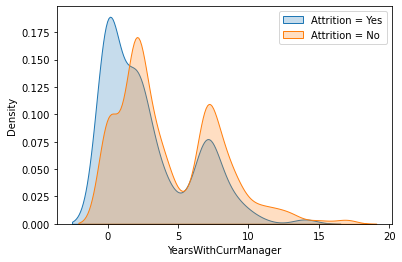

In [57]:
area_chart(df_eda,'YearsWithCurrManager')

- Employees who stay at company with the same manager for a longer period of time have lower attrition rate.

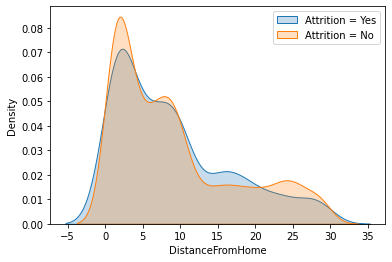

In [58]:
area_chart(df_eda,'DistanceFromHome')

- No clear trend in attrition with respect to distance between home and work.

#### Featuring Engineering

- Label Encoding

Transform the categorical values of the relevant features into numerical ones using Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
df5=df4.copy()
# Create a list has all categorical features
cat_cols= df5.select_dtypes(include='object').columns
# Fitted SKlearn LabelEncoder
label_encoder = LabelEncoder()
# Dictionary mapping labels of the categorical features to their integer values 
label_encoder_data_dictionary={}
for col in cat_cols:
    # Encode labels in categorical column.
    df5[col]= label_encoder.fit_transform(df5[col])
    res = {}
    for cl in label_encoder.classes_:
        res.update({cl:label_encoder.transform([cl])[0]})
    label_encoder_data_dictionary[col] = res

In [60]:
# Check if the dataset has any categorical values
cat_cols= df5.select_dtypes(include='object').columns
print(cat_cols)

Index([], dtype='object')


In [61]:
# Dictionary mapping labels of the categorical features to their integer values 
label_encoder_data_dictionary

{'Attrition': {'No': 0, 'Yes': 1},
 'BusinessTravel': {'Non-Travel': 0,
  'Travel_Frequently': 1,
  'Travel_Rarely': 2},
 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2},
 'EducationField': {'Human Resources': 0,
  'Life Sciences': 1,
  'Marketing': 2,
  'Medical': 3,
  'Other': 4,
  'Technical Degree': 5},
 'Gender': {'Female': 0, 'Male': 1},
 'JobRole': {'Healthcare Representative': 0,
  'Human Resources': 1,
  'Laboratory Technician': 2,
  'Manager': 3,
  'Manufacturing Director': 4,
  'Research Director': 5,
  'Research Scientist': 6,
  'Sales Executive': 7,
  'Sales Representative': 8},
 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}}

- Features scaling.

This dataset has many features computed by different measurements and units, so it is necessary to scale the features (except Id and SalePrice columns) to apply the ML models.

In this project, I use PowerTransformer normalization in order to handle the outliers better.

In [62]:
from sklearn.preprocessing import PowerTransformer
df6=df5.copy()
df6=df6.loc[:, ~df6.columns.isin(['Attrition','MonthlyIncome'])]
scalar=PowerTransformer()
df6=pd.DataFrame(scalar.fit_transform(df6),columns = df6.columns)
df6 = pd.concat([df6, df5.reset_index()[['Attrition','MonthlyIncome']]],axis=1,ignore_index=False)
df6.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,absences_days,mean_actual_hours,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,MonthlyIncome
0,1.450117,0.635468,1.377454,-0.050827,-0.916940,-0.960488,-1.224745,-1.170135,-1.776741,-0.131447,-0.573602,-1.488918,-1.087933,-1.990143,2.248381,-1.440442,-1.094862,-1.550156,0.785262,-0.091031,0.326033,-0.395874,0.204262,1.197140,-1.116451,0,131160
1,-0.597882,-1.392865,-0.472127,0.479509,-1.771185,-0.960488,-1.224745,-1.170135,0.621571,1.235505,-1.670595,1.679689,0.548969,-0.592520,0.217384,-0.066114,0.096854,0.239219,0.092494,0.214037,-1.058710,2.375245,0.204262,-0.712876,2.010322,1,41890
2,-0.474486,-1.392865,-0.472127,1.063256,1.082871,1.247620,0.816497,1.500164,1.040668,-0.131447,-0.573602,0.201133,1.785018,-0.793597,-0.578785,-0.066114,-1.094862,-0.053000,-1.035133,-0.270588,0.326033,-0.395874,-0.713233,-0.712876,-2.148240,0,193280
3,0.210221,-1.846466,-0.472127,-1.031215,2.198276,-0.960488,0.816497,1.009822,-1.399303,-0.131447,0.469233,-1.488918,1.785018,0.433599,1.615639,0.482432,1.454429,0.490147,0.269215,-0.179123,-1.058710,-0.395874,1.211586,1.197140,0.273687,0,83210
4,-0.474486,0.635468,-0.472127,0.479509,-1.771185,0.697390,0.816497,-1.170135,1.040668,1.235505,0.793872,-0.948760,1.313755,-0.090696,-0.578785,0.139692,-1.094862,0.239219,-1.664605,0.608628,0.326033,-0.395874,1.211586,-1.514232,0.273687,0,23420


In [63]:
# Apply log transformation on the MonthlyIncome feature (high skewness)
df6['MonthlyIncome'] = np.log(df6.MonthlyIncome)

In [64]:
#  Univariate analysis
df6.skew()

Age                       -0.007598
BusinessTravel            -0.969846
Department                 0.013791
DistanceFromHome          -0.007463
Education                 -0.099813
EducationField            -0.008380
Gender                    -0.408387
JobLevel                   0.103554
JobRole                   -0.319441
MaritalStatus             -0.156804
NumCompaniesWorked         0.014757
PercentSalaryHike          0.116171
StockOptionLevel           0.086960
TotalWorkingYears         -0.010289
TrainingTimesLastYear      0.058018
YearsAtCompany            -0.008677
YearsSinceLastPromotion    0.211985
YearsWithCurrManager      -0.067519
absences_days             -0.131636
mean_actual_hours          0.109226
JobInvolvement            -0.020351
PerformanceRating          1.920574
EnvironmentSatisfaction   -0.206185
JobSatisfaction           -0.212005
WorkLifeBalance           -0.009905
Attrition                  1.843111
MonthlyIncome              0.285997
dtype: float64

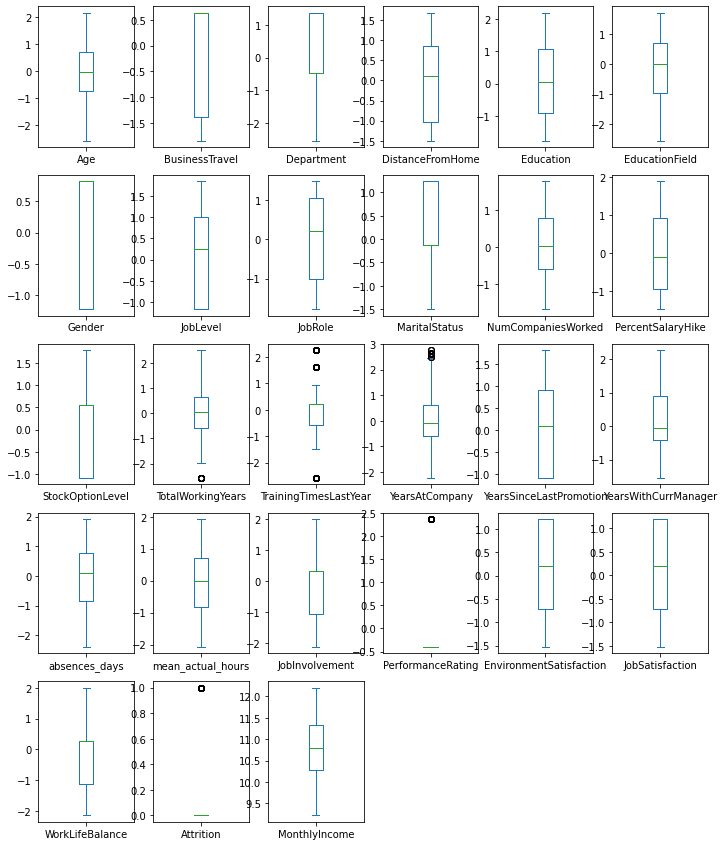

In [65]:
df6.plot(kind='box', subplots = True, layout = (5,6), figsize=(12,15));

Check the target feature (Attrition)

In [66]:
df6['Attrition'].unique()

array([0, 1])

- Features Selection
To reduce the features for the linear regression and  skip the not useful ones.

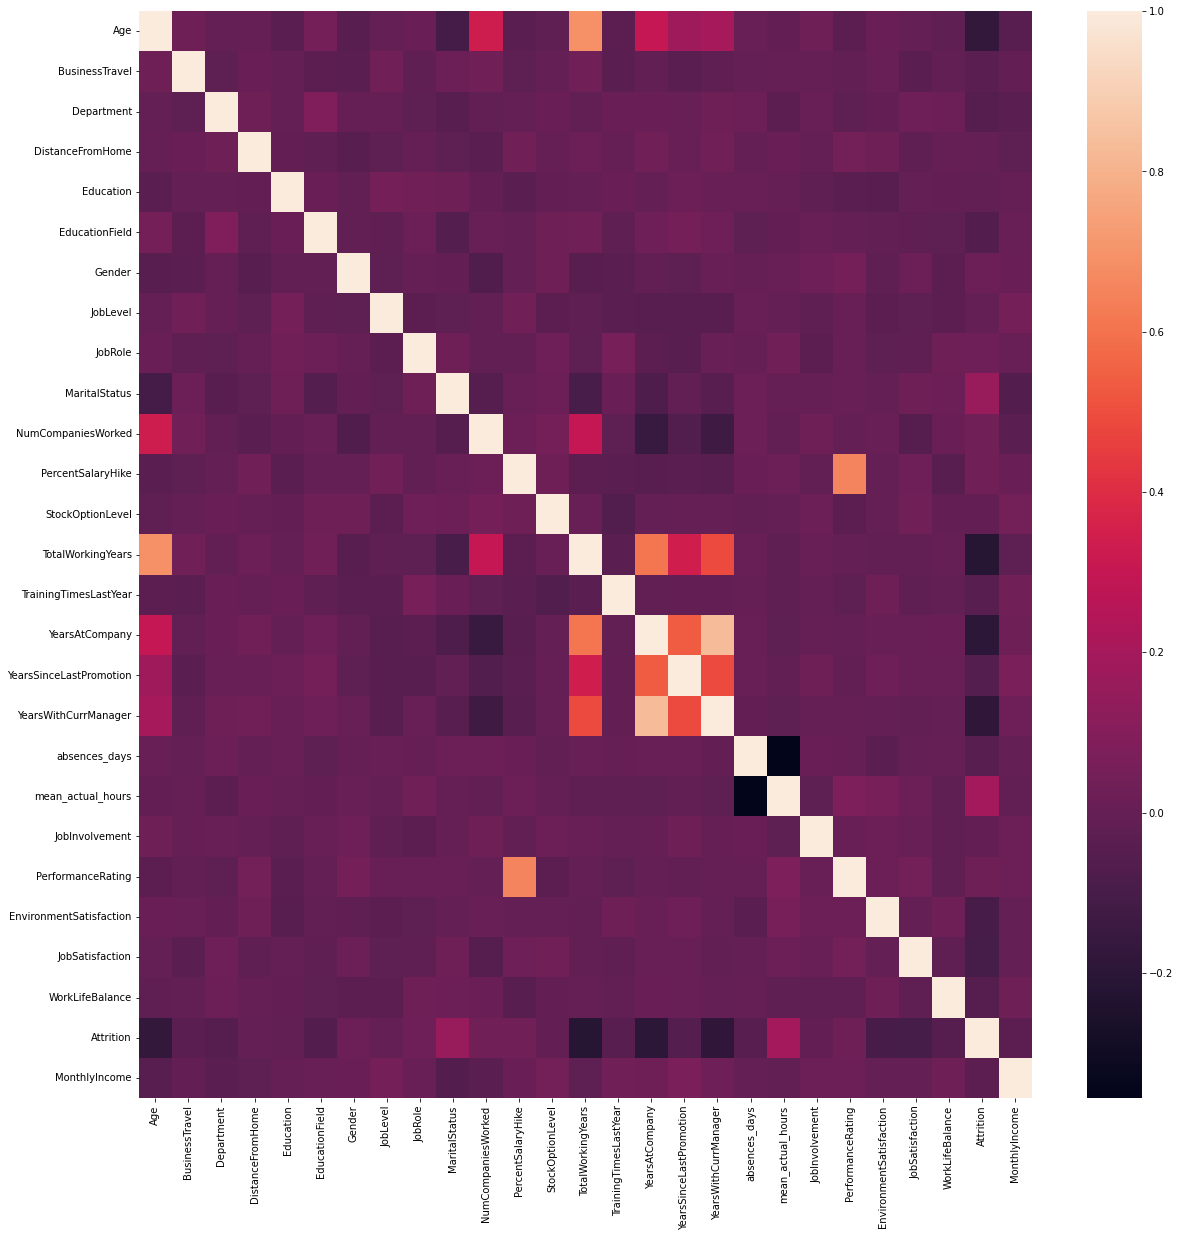

In [67]:
# Plot a heatmap of correlation
corr = df6.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cbar=True)
plt.show()

There is multi collinearity among some features

In [69]:
# Unstack and sort the DataFrame to get the most correlated pairs.
corr = df6.corr().abs()
unstack_corr = corr.unstack()
sorted_unstack_corr = unstack_corr.sort_values(kind="quicksort")

In [70]:
# Iterate over sorted_unstack_corr and find if it has collinearity more than 0.75.
for i in range (0,len(sorted_unstack_corr)):
    if  sorted_unstack_corr[i]>0.75 and sorted_unstack_corr[i]<1.0:
        print (sorted_unstack_corr[i],sorted_unstack_corr.index[i])


0.8305258360436878 ('YearsAtCompany', 'YearsWithCurrManager')
0.8305258360436878 ('YearsWithCurrManager', 'YearsAtCompany')


'YearsWithCurrManager'and 'YearsAtCompany' are highly coorelated, so drop 'YearsWithCurrManager'.
'PerformanceRating', 'PercentSalaryHike' are highly coorelated, so drop 'PerformanceRating'.

In [71]:
df7=df6.copy()
df7.drop(columns={'YearsWithCurrManager'},inplace=True)
df7.shape

(4410, 26)

In [72]:
# Capture the dependent feature from the dataset (y-train).
y_train=df7[['Attrition']]

In [73]:
# Capture the independent feature from the dataset (X-train).
X_train=df7.drop(['Attrition'],axis=1)

#### Model building Phase
1. Split the data
2. Defining evaluation functions.
3. Machine Learning Models.
4. Model Comparison.

Split the train data as x_train , x_test, y_train, y_test using sklearn library

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3)

- Defining evaluation functions.

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

def evaluation(y_test, y_pred):
    AccScore = accuracy_score(y_test, y_pred, normalize=False)
    print('Accuracy Score is : ', AccScore)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is:')
    print(ClassificationReport)
    ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
    print('ROCAUC Score : ', ROCAUCScore)
    ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False)
    print('Zero One Loss Value : ', ZeroOneLossValue )
    ConfusionMatrix=confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', ConfusionMatrix )
#   Plot ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    area = auc(fpr, tpr)
    plt.figure(figsize=(18,5))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % area)
    plt.plot([0, 1], [0, 1],color='g', marker='_')
    plt.title('ROC Curve', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.legend(loc = 'lower right', fontsize = 12)
    plt.show()

In [76]:
# Define Cross_Validation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

- Machine Learning Classification Models.

Will use the most common types of classification algorithms: Logistic Regression, Naïve Bayes, Stochastic Gradient Descent, K-Nearest Neighbours, Decision Tree, Random Forest, Ridge, Bagging, Gradient Boosting, and Support Vector Machine

In [77]:
# Import classification models from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Dictionary contains all classification algorithms that we want to train and its hyperparameters that we want to tune.
clf_algos={
        'LogisticRegression':{
            'model':LogisticRegression(),
            'params':{
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }
        }
        ,
        'RidgeClassifier':{
            'model':RidgeClassifier(),
            'params':{
                'alpha':[0.1, 0.9]
            }
        }
        ,
        'KNeighborsClassifier':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors' : range(1, 21, 2),
                'weights' : ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
            }
        },
        'SVC':{
            'model':SVC(),
            'params':{
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'degree': list(range(2, 6)),
                 'gamma': ['auto', 'scale'],
            }
        },
        'BaggingClassifier':{
            'model':BaggingClassifier(),
            'params':{
                'n_estimators' : [10, 100, 1000]
            }
        },
        'RandomForestClassifier':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators' : [10, 100, 1000],
                'criterion': ['gini', 'entropy'],
                 'max_features': ['sqrt', 'log2']
            }
        }
        ,
        'GradientBoostingClassifier':{
            'model':GradientBoostingClassifier(),
            'params':{
                'n_estimators' : [10, 1000],
                'learning_rate' : [0.1],
            }
        }
        ,
        'SGDClassifier':{
            'model':SGDClassifier(),
            'params':{
                'alpha': [1e0, 1e1, 1e2, 1e3], # learning rate
                'loss': ['log','squared_loss'], # logistic regression,
            }
        }
        ,
        'DecisionTreeClassifier ':{
            'model':DecisionTreeClassifier(),
            'params':{     
                 'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
            }
        }
        ,
        'GaussianNB ':{
            'model':GaussianNB(),
            'params':{
            }
        }
}

In [78]:
# Import libraries to train, evaluate and save the models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import joblib

# Function carry on multitasks:
# 1- Train different types of classification algorithms.
# 2- Hyperparameter tuning using GridSearchCV.
# 3- Evaluate each classification algorithm by diffirent types of metrices.
# 4- Make a report with best score and best Hyperparameter for each classification algorithm.
# 5- Save each trained model in pickle file using joblib.

def best_clf_model(X_train, y_train, X_test, y_test):
#     flatten y_train
    y_train=y_train.values.ravel()
#     Lists to add the result in
    ml_models,model_scores,predictions=[],[],[]
#     Cross Validation
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#     Loop on clf_algo dictionary
    for algo_name,config in clf_algos.items():
        print('--------------------------------------------------------------------------------------------------------')
        print(f'{algo_name} started')
#         use GridSearchCV to tune the hyperparameteres for the algorithm
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False).fit(X_train, y_train)
#     Find y_predict
        y_pred=gs.predict(X_test)
#     Error validation functions
        print(f'{algo_name} Evaluation:')        
        evaluation(y_test, y_pred)
        cv_score = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5,n_jobs=-1,verbose=3).mean()
#         Add the scores to the lists
        model_scores.append({

                            "Model_name": algo_name,
                            "best_score":gs.best_score_,
                            "Cross_Validation_Score": cv_score,
                            "best_params":gs.best_params_,
                            "best_estimator":gs.best_estimator_})
        predictions.append({"Model_name": algo_name,"y_pred":y_pred})
        print(f'{algo_name} is done')
#         Save the trained model
        joblib.dump(gs.best_estimator_, f'{algo_name}.pkl', compress = 1)
    return pd.DataFrame(model_scores, columns=["Model_name","best_score",
                                            "Cross_Validation_Score",
                                            "best_params",
                                            "best_estimator"]
                       ).sort_values(by="Cross_Validation_Score"),pd.DataFrame(predictions, columns=["Model_name","y_pred"])

--------------------------------------------------------------------------------------------------------
LogisticRegression started
LogisticRegression Evaluation:
Accuracy Score is :  758
Classification Report is:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       736
           1       0.68      0.28      0.40       146

    accuracy                           0.86       882
   macro avg       0.78      0.63      0.66       882
weighted avg       0.84      0.86      0.83       882

ROCAUC Score :  0.6275033502084574
Zero One Loss Value :  124
Confusion Matrix:
 [[717  19]
 [105  41]]


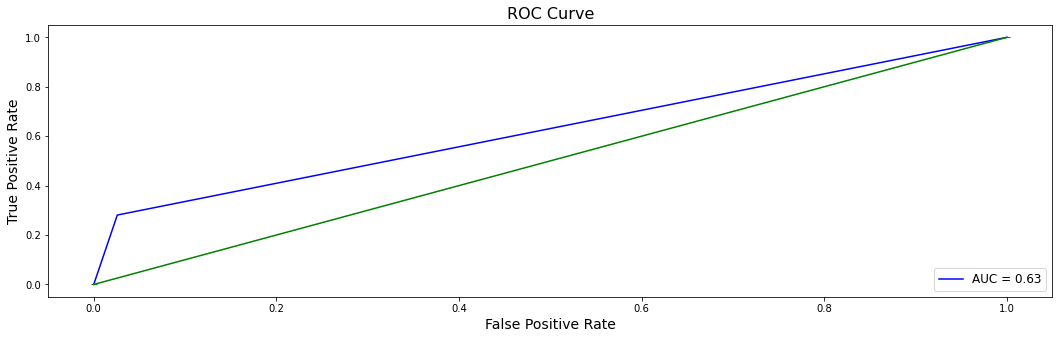

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


LogisticRegression is done
--------------------------------------------------------------------------------------------------------
RidgeClassifier started
RidgeClassifier Evaluation:
Accuracy Score is :  738
Classification Report is:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       736
           1       0.60      0.04      0.08       146

    accuracy                           0.84       882
   macro avg       0.72      0.52      0.49       882
weighted avg       0.80      0.84      0.77       882

ROCAUC Score :  0.5178305539011316
Zero One Loss Value :  144
Confusion Matrix:
 [[732   4]
 [140   6]]


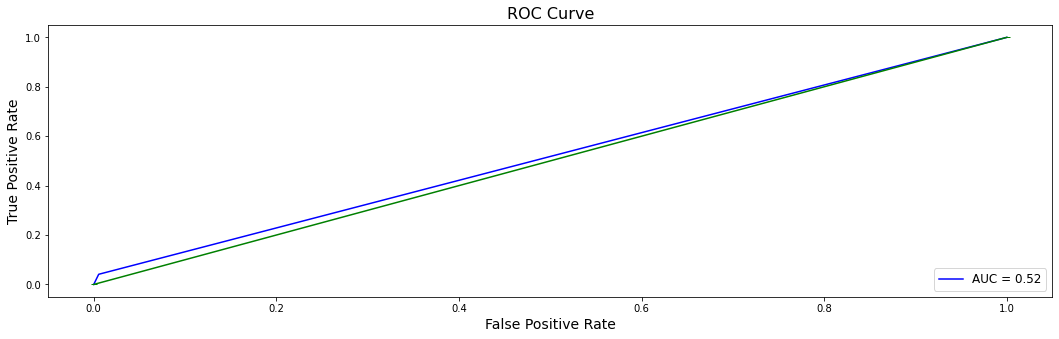

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


RidgeClassifier is done
--------------------------------------------------------------------------------------------------------
KNeighborsClassifier started
KNeighborsClassifier Evaluation:
Accuracy Score is :  878
Classification Report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       0.99      0.99      0.99       146

    accuracy                           1.00       882
   macro avg       0.99      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

ROCAUC Score :  0.991791989279333
Zero One Loss Value :  4
Confusion Matrix:
 [[734   2]
 [  2 144]]


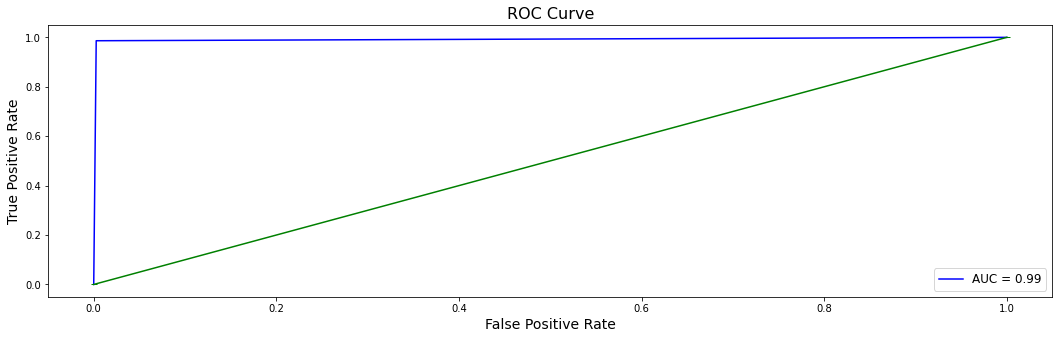

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


KNeighborsClassifier is done
--------------------------------------------------------------------------------------------------------
SVC started
SVC Evaluation:
Accuracy Score is :  876
Classification Report is:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       736
           1       0.96      1.00      0.98       146

    accuracy                           0.99       882
   macro avg       0.98      1.00      0.99       882
weighted avg       0.99      0.99      0.99       882

ROCAUC Score :  0.9959239130434783
Zero One Loss Value :  6
Confusion Matrix:
 [[730   6]
 [  0 146]]


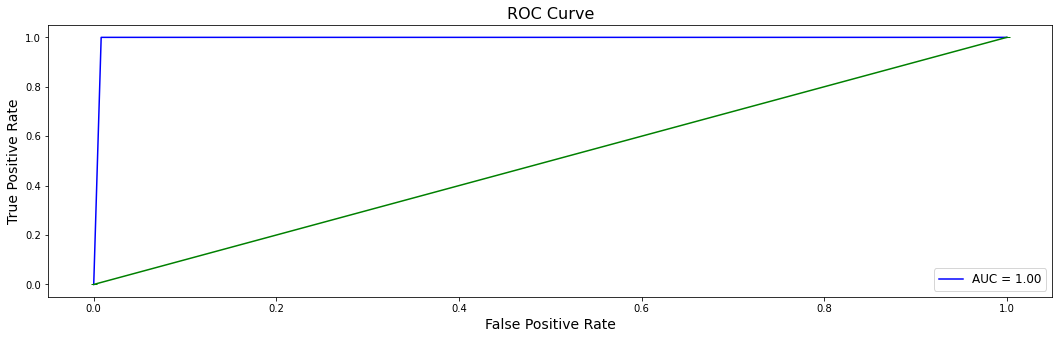

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


SVC is done
--------------------------------------------------------------------------------------------------------
BaggingClassifier started
BaggingClassifier Evaluation:
Accuracy Score is :  869
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       736
           1       0.97      0.94      0.95       146

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.97       882
weighted avg       0.99      0.99      0.99       882

ROCAUC Score :  0.966460690887433
Zero One Loss Value :  13
Confusion Matrix:
 [[732   4]
 [  9 137]]


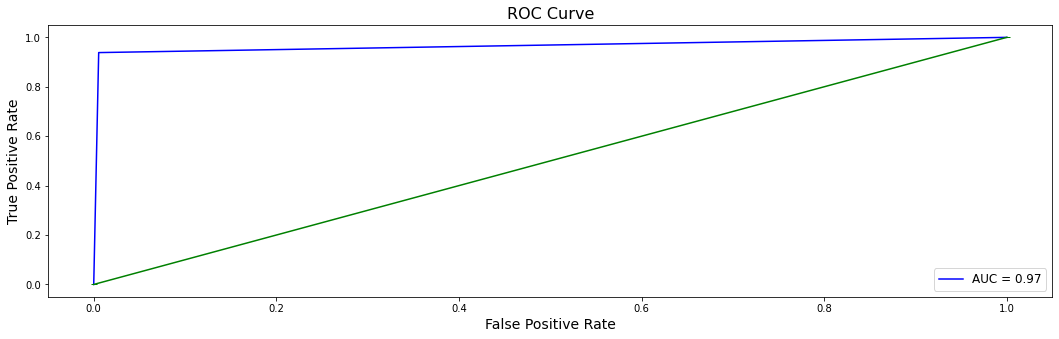

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


BaggingClassifier is done
--------------------------------------------------------------------------------------------------------
RandomForestClassifier started
RandomForestClassifier Evaluation:
Accuracy Score is :  878
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       736
           1       1.00      0.97      0.99       146

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

ROCAUC Score :  0.9863013698630136
Zero One Loss Value :  4
Confusion Matrix:
 [[736   0]
 [  4 142]]


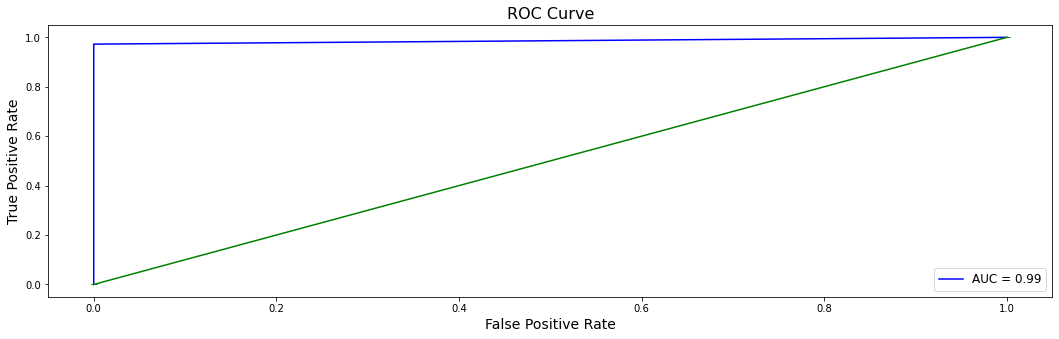

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


RandomForestClassifier is done
--------------------------------------------------------------------------------------------------------
GradientBoostingClassifier started
GradientBoostingClassifier Evaluation:
Accuracy Score is :  868
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       736
           1       0.95      0.95      0.95       146

    accuracy                           0.98       882
   macro avg       0.97      0.97      0.97       882
weighted avg       0.98      0.98      0.98       882

ROCAUC Score :  0.9712719624776653
Zero One Loss Value :  14
Confusion Matrix:
 [[729   7]
 [  7 139]]


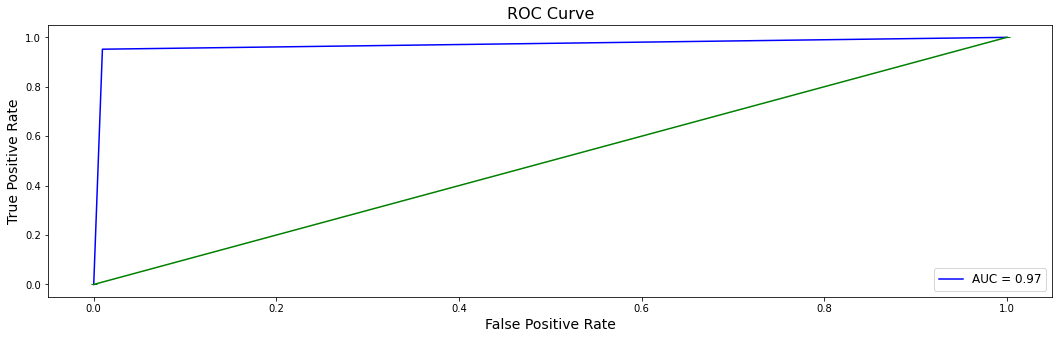

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


GradientBoostingClassifier is done
--------------------------------------------------------------------------------------------------------
SGDClassifier started
SGDClassifier Evaluation:
Accuracy Score is :  736
Classification Report is:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       736
           1       0.00      0.00      0.00       146

    accuracy                           0.83       882
   macro avg       0.42      0.50      0.45       882
weighted avg       0.70      0.83      0.76       882

ROCAUC Score :  0.5
Zero One Loss Value :  146
Confusion Matrix:
 [[736   0]
 [146   0]]


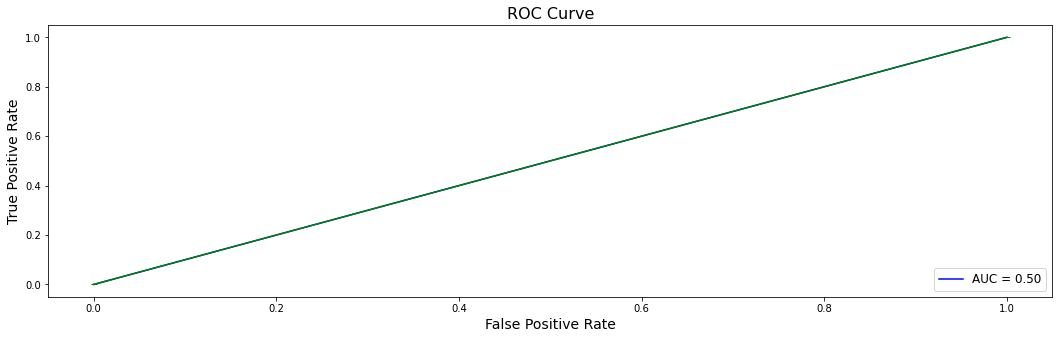

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


SGDClassifier is done
--------------------------------------------------------------------------------------------------------
DecisionTreeClassifier  started
DecisionTreeClassifier  Evaluation:
Accuracy Score is :  857
Classification Report is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       736
           1       0.91      0.92      0.92       146

    accuracy                           0.97       882
   macro avg       0.95      0.95      0.95       882
weighted avg       0.97      0.97      0.97       882

ROCAUC Score :  0.9528178975580702
Zero One Loss Value :  25
Confusion Matrix:
 [[722  14]
 [ 11 135]]


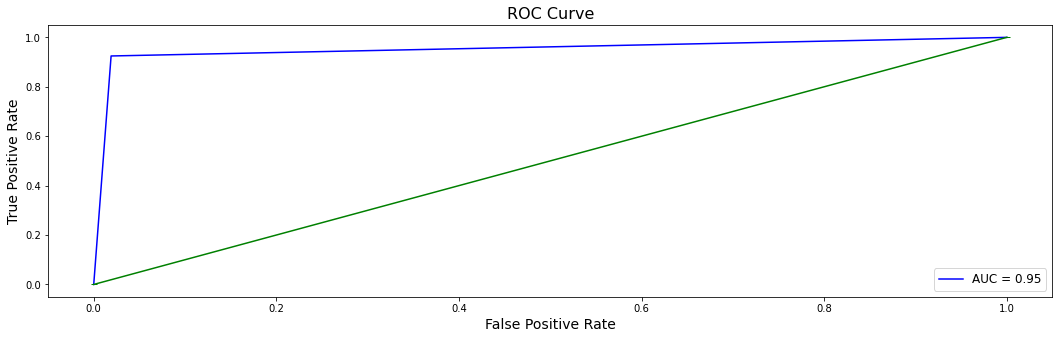

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


DecisionTreeClassifier  is done
--------------------------------------------------------------------------------------------------------
GaussianNB  started
GaussianNB  Evaluation:
Accuracy Score is :  745
Classification Report is:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       736
           1       0.55      0.36      0.43       146

    accuracy                           0.84       882
   macro avg       0.71      0.65      0.67       882
weighted avg       0.83      0.84      0.83       882

ROCAUC Score :  0.6488702352590828
Zero One Loss Value :  137
Confusion Matrix:
 [[693  43]
 [ 94  52]]


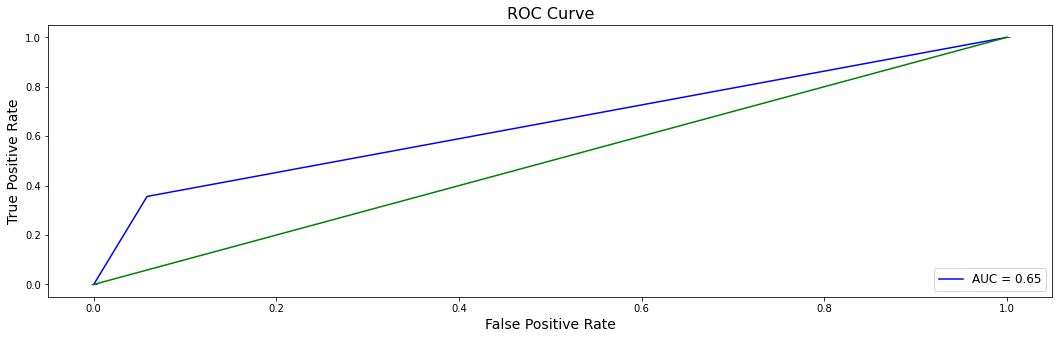

GaussianNB  is done


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [79]:

clf_model_scores,clf_predictions=best_clf_model(X_train, y_train, X_test,y_test)

In [80]:
# A report with best score and best Hyperparameter for each classification algorithm.
clf_model_scores

,Model_name,best_score,Cross_Validation_Score,best_params,best_estimator
7,SGDClassifier,0.848159,0.839853,"{'alpha': 1.0, 'loss': 'log'}","SGDClassifier(alpha=1.0, loss='log')"
1,RidgeClassifier,0.855807,0.847221,{'alpha': 0.1},RidgeClassifier(alpha=0.1)
9,GaussianNB,0.858357,0.852882,{},GaussianNB()
0,LogisticRegression,0.871388,0.862807,{'solver': 'newton-cg'},LogisticRegression(solver='newton-cg')
8,DecisionTreeClassifier,0.963173,0.951246,"{'criterion': 'entropy', 'splitter': 'random'}","DecisionTreeClassifier(criterion='entropy', sp..."
3,SVC,0.975354,0.967689,"{'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}","SVC(degree=5, gamma='auto', kernel='poly')"
4,BaggingClassifier,0.973088,0.968820,{'n_estimators': 100},(DecisionTreeClassifier(random_state=118750465...
6,GradientBoostingClassifier,0.976771,0.969954,"{'learning_rate': 0.1, 'n_estimators': 1000}",([DecisionTreeRegressor(criterion='friedman_ms...
2,KNeighborsClassifier,0.979037,0.972788,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...","KNeighborsClassifier(metric='manhattan', weigh..."
5,RandomForestClassifier,0.979037,0.973071,"{'criterion': 'entropy', 'max_features': 'sqrt...","(DecisionTreeClassifier(criterion='entropy', m..."


After performing the data preprocessing, model building and validation, there are many models that have a good accuracy. I will use RandomForestClassifier model. It can be deployed to predict the probability that an employee will leave the company.

Accuracy  score for the model is very well, which means the model performed extremely well. Also the other performance Metric's values were greater than 95%.

The model classified both of the classes of Attrition properly. High F1 score represents how much the model has learned to predict the employee Attrition properly, which confirmed by the Confusion Matrix.

From ROCAUC Score value (0.99), the model has good prediction performance.

In [81]:
#  Best parameters for the RandomForestClassifier model is:
# model_scores.best_estimator[5]

In [82]:
# Print the predictions for each model
clf_predictions

,Model_name,y_pred
0,LogisticRegression,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,RidgeClassifier,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,KNeighborsClassifier,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,SVC,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
4,BaggingClassifier,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
5,RandomForestClassifier,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
6,GradientBoostingClassifier,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
7,SGDClassifier,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,DecisionTreeClassifier,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
9,GaussianNB,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


## Predict Years at Company

#### Model building Phase
1. Prepare data
2. Defining evaluation functions.
3. Machine Learning Models.
4. Model Comparison.

#### 1. Split the train data as x_train , x_test, y_train, y_test

In [83]:
#  Drop all data where Attrition is equal 0 (No Attrition)
df8=df7[df7.Attrition==1]
df8.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,absences_days,mean_actual_hours,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,MonthlyIncome
1,-0.597882,-1.392865,-0.472127,0.479509,-1.771185,-0.960488,-1.224745,-1.170135,0.621571,1.235505,-1.670595,1.679689,0.548969,-0.592520,0.217384,-0.066114,0.096854,0.092494,0.214037,-1.058710,2.375245,0.204262,-0.712876,2.010322,1,10.642802
6,-0.987055,0.635468,-0.472127,0.582197,-0.916940,0.697390,0.816497,0.241622,1.040668,1.235505,0.042818,1.281630,0.548969,-0.793597,-0.578785,-2.229591,-1.094862,0.785262,-0.602139,0.326033,2.375245,-1.522591,0.196996,-2.148240,1,10.970437
13,1.097202,-1.846466,-0.472127,-1.494085,-1.771185,0.697390,0.816497,-1.170135,0.621571,-0.131447,-0.573602,-1.488918,1.313755,0.052577,0.942515,0.762660,1.590412,0.269215,1.247921,-1.058710,-0.395874,-1.522591,-0.712876,-1.116451,1,10.961625
28,0.817147,-1.392865,-0.472127,-1.494085,-0.916940,0.697390,0.816497,0.241622,0.621571,-1.505270,0.469233,-0.121307,0.548969,1.049187,-0.578785,-1.440442,-1.094862,-1.238280,1.872801,-1.058710,-0.395874,1.211586,0.196996,-2.148240,1,11.545683
30,-1.264315,0.635468,-0.472127,-0.442291,0.040522,0.697390,0.816497,1.009822,0.621571,-1.505270,0.042818,-1.488918,-1.087933,-0.793597,1.615639,-0.591845,-1.094862,-0.269266,1.550218,-1.058710,-0.395874,-1.522591,-0.712876,0.273687,1,11.135173


In [84]:
#  Drop Attrition feature because it has just one value, which won't be affected on the model training
df8=df8.loc[:, ~df8.columns.isin(['Attrition'])]

In [85]:
# Capture the dependent feature from the dataset (y-train).
y_train=df8[['YearsAtCompany']]

In [86]:
# Capture the independent feature from the dataset (X-train).
X_train=df8.drop(['YearsAtCompany'],axis=1)

In [87]:
# Split the train data as x_train , x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3)

- Machine Learning Regression Models.

Will use the most common types of regression algorithms: Linear Regression, Lasso, Ridge Regression, Decision Tree Regressor, ElasticNet, Random Forest Regression, Gradient Boosting Regression, XGBoost Regressor, and Support Vector Machine

In [88]:
!pip install xgboost

In [89]:
# Import classification models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor

# Dictionary contains all regression algorithms that we want to train and its hyperparameters that we want to tune.
reg_algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cycle']
            }
        },
        'ridge_regression':{
            'model':Ridge(),
            'params':{}
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random'],
                'max_depth' : [10],
                'min_samples_leaf' : [2]
            }
        },
        'elastic_net':{
            'model':ElasticNet(),
            'params':{}
        },
        'SVR':{
            'model':SVR(),
            'params':{
                'C':[100000,0.7],
                'kernel' : ['rbf'],
                'gamma' : ['auto'],
                'degree':[4],
#                 'epsilon':[0.002],
                'coef0':[20]
            }
        },
        'Random_Forest_Regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,1500],
                'max_depth' : [3]
            }
        },
        'GradientBoostingRegressor':{
            'model':GradientBoostingRegressor(),
            'params':{
                'n_estimators':[100,1500],
                'learning_rate':[0.01,0.015],
                'max_depth':[3],
                'min_samples_leaf':[1],
                'random_state':[2],
                'subsample' : [0.2]
            }
        }
        ,
        'XGBoost Regressor':{
            'model':XGBRegressor(),
            'params':{
                'n_estimators':[100],
                'learning_rate':[0.01]
            }
        }

}

In [90]:
# Import libraries to train, evaluate and save the models.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# Function carry on multitasks:
# 1- Train different types of Regression algorithms.
# 2- Hyperparameter tuning using GridSearchCV.
# 3- Evaluate each regression algorithm by diffirent types of metrices.
# 4- Make a report with best score and best Hyperparameter for each regression algorithm.
# 5- Save each trained model in pickle file using joblib.

def best_reg_model(X_train, y_train, X_test, y_test):
#     Lists to add the result in
    ml_models,model_scores,predictions=[],[],[]
#    Cross Validation
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#     Loop on reg_algo dictionary
    for algo_name,config in reg_algos.items():
#         use GridSearchCV to tune the hyperparameteres for the algorithm
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False).fit(X_train, y_train)
#     Find y_predict
        y_pred=gs.predict(X_test)
#     Error validation functions
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_pred)
        rmse_cv = np.sqrt(-cross_val_score(gs, X_train, y_train, scoring="neg_mean_squared_error", cv=5)).mean()
#         Add the scores to the lists
        model_scores.append({
                          "Model_name": algo_name,
                          "best_score":gs.best_score_,
                          "mean_absolute_error": mae,
                          "mean_squared_error": mse,
                          "root_mean_squared_error": rmse,
                          "r2_score": r_squared,
                          "RMSE_Cross_Validation": rmse_cv,
                          "best_params":gs.best_params_,
                            "best_estimator":gs.best_estimator_})
        predictions.append({"Model_name": algo_name,"y_pred":y_pred})
        joblib.dump(gs.best_estimator_, f'{algo_name}.pkl', compress = 1)
#         Save the trained model
        print(f'{algo_name} is done')        
    return pd.DataFrame(model_scores, columns=["Model_name","best_score",
                                            "mean_absolute_error",
                                            "mean_squared_error", 
                                            "root_mean_squared_error",
                                            "r2_score",
                                            "RMSE_Cross_Validation",
                                            "best_params",
                                            "best_estimator"]
                       ).sort_values(by="RMSE_Cross_Validation"
                                    ),pd.DataFrame(predictions, columns=["Model_name","y_pred"])

In [91]:
reg_model_scores,reg_predictions=best_reg_model(X_train, y_train, X_test,y_test)

linear_regression is done
lasso is done
ridge_regression is done
DecisionTreeRegressor is done
elastic_net is done
SVR is done
Random_Forest_Regressor is done
GradientBoostingRegressor is done
XGBoost Regressor is done


In [92]:
# A report with best score and best Hyperparameter for each classification algorithm.
reg_model_scores

,Model_name,best_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,RMSE_Cross_Validation,best_params,best_estimator
7,GradientBoostingRegressor,0.938813,0.138713,0.034836,0.186644,0.967614,0.288428,"{'learning_rate': 0.015, 'max_depth': 3, 'min_...",([DecisionTreeRegressor(criterion='friedman_ms...
5,SVR,0.925886,0.148842,0.056408,0.237503,0.947558,0.292154,"{'C': 100000, 'coef0': 20, 'degree': 4, 'gamma...","SVR(C=100000, coef0=20, degree=4, gamma='auto')"
3,DecisionTreeRegressor,0.906166,0.102365,0.128093,0.357901,0.880913,0.374155,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...","DecisionTreeRegressor(max_depth=10, min_sample..."
6,Random_Forest_Regressor,0.721941,0.367015,0.261667,0.511534,0.756731,0.556272,"{'max_depth': 3, 'n_estimators': 1500}","(DecisionTreeRegressor(max_depth=3, max_featur..."
2,ridge_regression,0.703480,0.455816,0.311847,0.558433,0.710079,0.599293,{},Ridge()
0,linear_regression,0.703400,0.456043,0.312069,0.558631,0.709873,0.599415,{'normalize': False},LinearRegression()
8,XGBoost Regressor,0.593726,0.488430,0.381282,0.617481,0.645526,0.659319,"{'learning_rate': 0.01, 'n_estimators': 100}","XGBRegressor(base_score=0.5, booster='gbtree',..."
4,elastic_net,0.282760,0.734286,0.762002,0.872927,0.291575,0.904698,{},ElasticNet()
1,lasso,-0.006327,0.860996,1.076229,1.037415,-0.000558,1.065016,"{'alpha': 1, 'selection': 'random'}","Lasso(alpha=1, selection='random')"


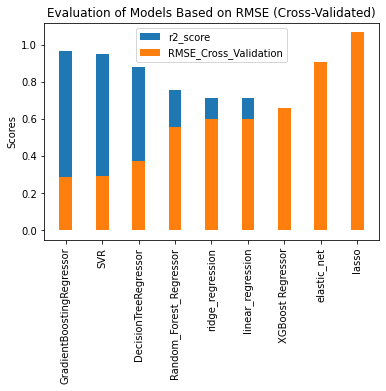

In [93]:
#  Stacked-bar chart show the r2_score and RMSE_Cross_Validation for each trained model
fig, ax = plt.subplots()
ax.bar(reg_model_scores["Model_name"], reg_model_scores["r2_score"], width = 0.35 , label='r2_score')
ax.bar(reg_model_scores["Model_name"], reg_model_scores["RMSE_Cross_Validation"],width = 0.35 , label='RMSE_Cross_Validation')
ax.set_ylabel('Scores')
plt.title("Evaluation of Models Based on RMSE (Cross-Validated)")
plt.xticks(rotation=90)
ax.legend()
plt.show()

After performing the data preprocessing, model building and validation, it's clear that GradientBoostingRegressor is the best model can be deployed to predict how many years may an employee stay at the company before leaving.

Accuracy score for the model is very well, which means the model performed extremely well. Also the other performance Metric's values were greater than 90%.

It's better for RMSE Cross Validation score to be less than 25%, but r2 score is ver high. The model has good prediction performance.

In [94]:
# Dictionary mapping labels provided by data source 
Provided_data_dictionary={
        'Education':{
            'Below College':1,
            'College':2,
            'Bachelor':3,
            'Master':4,
            'Doctor':5
        }
        ,
        'EnvironmentSatisfaction':{
            'Low':1,
            'Medium':2,
            'High':3,
            'Very High':4
        }
        ,
        'JobInvolvement':{
            'Low':1,
            'Medium':2,
            'High':3,
            'Very High':4
        }
        ,
        'JobSatisfaction':{
            'Low':1,
            'Medium':2,
            'High':3,
            'Very High':4
        }
        ,
        'PerformanceRating':{
            'Low':1,
            'Good':2,
            'Excellent':3,
            'Outstanding':4
        }
        ,
        'RelationshipSatisfaction':{
            'Low':1,
            'Medium':2,
            'High':3,
            'Very High':4
        }
        ,
        'WorkLifeBalance':{
            'Bad':1,
            'Good':2,
            'Better':3,
            'Best':4
        }
    }
# Dictionary mapping labels After Label Encoding process and the provided from data source
label_encoder_data_dictionary.update(Provided_data_dictionary)
data_dictionary=label_encoder_data_dictionary.copy()

In [95]:
data_dictionary

{'Attrition': {'No': 0, 'Yes': 1},
 'BusinessTravel': {'Non-Travel': 0,
  'Travel_Frequently': 1,
  'Travel_Rarely': 2},
 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2},
 'EducationField': {'Human Resources': 0,
  'Life Sciences': 1,
  'Marketing': 2,
  'Medical': 3,
  'Other': 4,
  'Technical Degree': 5},
 'Gender': {'Female': 0, 'Male': 1},
 'JobRole': {'Healthcare Representative': 0,
  'Human Resources': 1,
  'Laboratory Technician': 2,
  'Manager': 3,
  'Manufacturing Director': 4,
  'Research Director': 5,
  'Research Scientist': 6,
  'Sales Executive': 7,
  'Sales Representative': 8},
 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
 'Education': {'Below College': 1,
  'College': 2,
  'Bachelor': 3,
  'Master': 4,
  'Doctor': 5},
 'EnvironmentSatisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
 'JobInvolvement': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
 'JobSatisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Ver

Load the models

In [96]:
Attrition_clf=joblib.load("RandomForestClassifier.pkl")
years_at_company_reg=joblib.load("GradientBoostingRegressor.pkl")

In [97]:
# Attrition classification function with predict the years at the company if the attrition is yes
def Attrition_classification(
#     Age of the employee (18-60)
    Age,
#     'Non-Travel','Travel_Frequently','Travel_Rarely'
    BusinessTravel,
#     'Human Resources', 'Research & Development', 'Sales'
    Department,
#     Distance from home in kms
    DistanceFromHome,
#     'Below College','College','Bachelor','Master','Doctor'
    Education,
#     'Human Resources','Life Sciences','Marketing','Medical','Other','Technical Degree'
    EducationField,
#     'Female', 'Male'
    Gender,
#     A scale of 1 to 5
    JobLevel,
#     'Healthcare Representative','Human Resources','Laboratory Technician','Manager',
#     'Manufacturing Director','Research Director','Research Scientist','Sales Executive',
#     'Sales Representative'
    JobRole,
#     'Divorced', 'Married', 'Single'
    MaritalStatus,
#     Total number of companies the employee has worked for
    NumCompaniesWorked,
#     Percent salary hike for last year
    PercentSalaryHike,
#     Stock option level of the employee
    StockOptionLevel,
#     Total number of years the employee has worked so far
    TotalWorkingYears,
#     Number of times training was conducted for this employee last year
    TrainingTimesLastYear,
#     Total number of years spent at the company by the employee
    YearsAtCompany,
#     Number of years since last promotion
    YearsSinceLastPromotion,
#     Number of days that the employee didn't show up in 2015
    absences_days,
#     Mean of actual of work-hours in 2015
    mean_actual_hours,
#     'Low', 'Medium', 'High', 'Very High'
    JobInvolvement,
#     'Low', 'Good', 'Excellent', 'Outstanding'
    PerformanceRating,
#     'Low', 'Medium', 'High', 'Very High'
    EnvironmentSatisfaction,
#     'Low', 'Medium', 'High', 'Very High'
    JobSatisfaction,
#     'Bad', 'Good', 'Better', 'Best'
    WorkLifeBalance,
#     Monthly income in rupees per month
    MonthlyIncome
    ):
    attrs=np.zeros(len(X_train.columns)+1)
    attrs[0]=Age
    attrs[1]=data_dictionary['BusinessTravel'][BusinessTravel]
    attrs[2]=data_dictionary['Department'][Department]
    attrs[3]=DistanceFromHome
    attrs[4]=data_dictionary['Education'][Education]
    attrs[5]=data_dictionary['EducationField'][EducationField]
    attrs[6]=data_dictionary['Gender'][Gender]
    attrs[7]=JobLevel
    attrs[8]=data_dictionary['JobRole'][JobRole]
    attrs[9]=data_dictionary['MaritalStatus'][MaritalStatus]
    attrs[10]=NumCompaniesWorked
    attrs[11]=PercentSalaryHike
    attrs[12]=StockOptionLevel
    attrs[13]=TotalWorkingYears
    attrs[14]=TrainingTimesLastYear
    attrs[15]=YearsAtCompany
    attrs[16]=YearsSinceLastPromotion
    attrs[17]=absences_days
    attrs[18]=mean_actual_hours
    attrs[19]=data_dictionary['JobInvolvement'][JobInvolvement]
    attrs[20]=data_dictionary['PerformanceRating'][PerformanceRating]
    attrs[21]=data_dictionary['EnvironmentSatisfaction'][EnvironmentSatisfaction]
    attrs[22]=data_dictionary['JobSatisfaction'][JobSatisfaction]
    attrs[23]=data_dictionary['WorkLifeBalance'][WorkLifeBalance]
    attrs[24]=MonthlyIncome
#     Classification prediction for ATTRITION
    result=Attrition_clf.predict([attrs])[0]
    if result==1:
#         Drop YearsAtCompany feature from the arry because it's the target 
        attrs2=np.delete(attrs, obj=15)
#     Prediction for number of years at the company
        years_at_company=years_at_company_reg.predict([attrs2])[0]
        return f"There is a high probability that the employee will LEAVE the company in {years_at_company} years"
    return "There is a high probability that the employee will STAY at the company"

In [98]:
# Use Attrition_classification on a new employee
Attrition_classification(
#     Age of the employee (18-60)
    25,
#     'Non-Travel','Travel_Frequently','Travel_Rarely'
    'Travel_Rarely',
#     'Human Resources', 'Research & Development', 'Sales'
    'Sales',
#     Distance from home in kms
    30,
#     'Below College','College','Bachelor','Master','Doctor'
    'College',
#     'Human Resources','Life Sciences','Marketing','Medical','Other','Technical Degree'
    'Marketing',
#     'Female', 'Male'
    'Male',
#     A scale of 1 to 5
    3,
#     'Healthcare Representative','Human Resources','Laboratory Technician','Manager',
#     'Manufacturing Director','Research Director','Research Scientist','Sales Executive',
#     'Sales Representative'
    'Manager',
#     'Divorced', 'Married', 'Single'
    'Married',
#     Total number of companies the employee has worked for
    3,
#     Percent salary hike for last year
    12,
#     Stock option level of the employee, A scale of 0 to 3
    2,
#     Total number of years the employee has worked so far
    6,
#     Number of times training was conducted for this employee last year
    1,
#     Total number of years spent at the company by the employee
    3,
#     Number of years since last promotion
    1,
#     Number of days that the employee didn't show up in 2015
    6,
#     Mean of actual  of work-hours in 2015
    7,
#     'Low', 'Medium', 'High', 'Very High'
    'Medium',
#     'Low', 'Good', 'Excellent', 'Outstanding'
    'Good',
#     'Low', 'Medium', 'High', 'Very High'
    'High',
#     'Low', 'Medium', 'High', 'Very High'
    'Very High',
#     'Bad', 'Good', 'Better', 'Best'
    'Good',
#     Monthly income in rupees per month
    30000
    )

'There is a high probability that the employee will STAY at the company'

[CV]  ................................................................
[CV] .................................... , score=0.874, total=   1.8s
[CV]  ................................................................
[CV] .................................... , score=0.864, total=   0.8s
[CV]  ................................................................
[CV] .................................... , score=0.841, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.970, total=  42.0s
[CV]  ................................................................
[CV] .................................... , score=0.966, total=  47.0s
[CV]  ................................................................
[CV] .................................... , score=0.975, total= 1.9min
[CV]  ................................................................
[CV] .................................... , score=0.967, total= 1.7min
[CV]  

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  ................................................................
[CV] .................................... , score=0.864, total=   1.8s
[CV]  ................................................................
[CV] .................................... , score=0.843, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.850, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.967, total=  41.9s
[CV]  ................................................................
[CV] .................................... , score=0.976, total=  47.0s
[CV]  ................................................................
[CV] .................................... , score=0.973, total= 2.2min
[CV]  ................................................................
[CV] .................................... , score=0.977, total= 2.5min
[CV]  

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

### Conclusion
The patterns in data can help the management understand why the employee attrition is high, and what can be done to lower it.

During EDA, a lot of insights about Employee Attrition discovered. Some of the main reasons that cause employee attrition to rise is the HR work, bad work-life balance, Frequent Travels and Single Employees.

This model can help the management reduce costs related to hiring  new employees.